In [1]:
from tensorflow.keras.datasets import fashion_mnist #F

# Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Display basic information
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Class labels for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


Mean: 72.94035223214286, Standard Deviation: 90.02118235130519


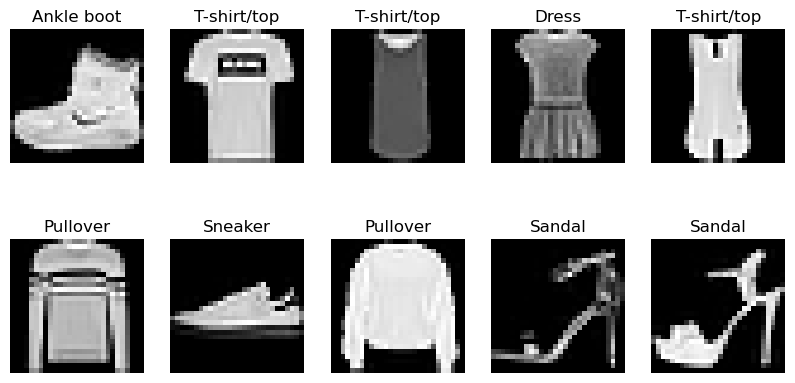

In [2]:
import numpy as np  #F
import matplotlib.pyplot as plt

# Calculate mean and standard deviation
mean = np.mean(X_train)
std_dev = np.std(X_train)
print(f"Mean: {mean}, Standard Deviation: {std_dev}")

# Visualize sample images from the dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()


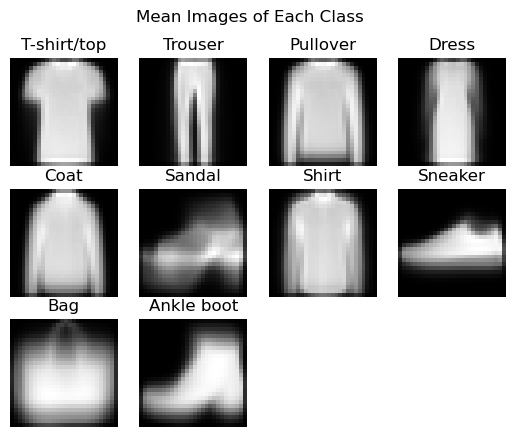

In [6]:
import seaborn as sns

for i, class_label in enumerate(class_names):
    
    # Compute mean image for the class
    class_images = X_train[y_train == i]
    mean_image = np.mean(class_images, axis=0)
    
    #mean image for each class
    plt.subplot(3, 4, i + 1)
    plt.imshow(mean_image, cmap='gray')
    plt.title(class_label)
    plt.axis('off')

plt.suptitle("Mean Images of Each Class")
plt.show()

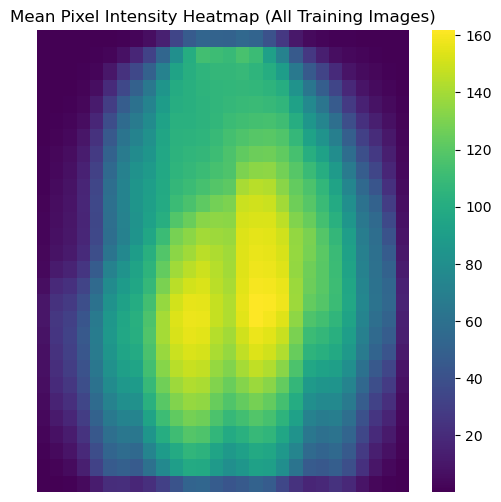

In [7]:
#Pixel Intensity Heatmap
mean_image = np.mean(X_train, axis=0)
plt.figure(figsize=(6, 6))
sns.heatmap(mean_image, cmap='viridis')
plt.title("Mean Pixel Intensity Heatmap (All Training Images)")
plt.axis('off')
plt.show()

In [9]:
import numpy as np

unique, counts = np.unique(y_train, return_counts=True)

class_counts = dict(zip(class_names, counts))

for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")


T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000


In [38]:
# FNN: Flatten the images and normalize pixel values #A
X_train_fnn = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_fnn = X_test.reshape(X_test.shape[0], -1) / 255.0


In [39]:
# CNN: Reshape and normalize the data #B 
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1) / 255.0
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1) / 255.0


In [40]:
# RNN: Reshape the data to treat each row as a time step #M 
X_train_rnn = X_train.reshape(X_train.shape[0], 28, 28) / 255.0
X_test_rnn = X_test.reshape(X_test.shape[0], 28, 28) / 255.0


In [41]:
from tensorflow.keras.models import Sequential #A 
from tensorflow.keras.layers import Dense, Dropout

# Build the improved FNN model with dropout
fnn_model = Sequential([
    Dense(512, activation='relu', input_shape=(28 * 28,)),
    Dropout(0.3),  # Dropout with 30% rate after the first hidden layer
    Dense(256, activation='relu'),
    Dropout(0.3),  # Dropout with 30% rate after the second hidden layer
    Dense(10, activation='softmax')  # 10 classes for Fashion-MNIST
])

# Compile the model with a slightly reduced learning rate
fnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

# Set up early stopping with patience
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)




c:\Users\heysi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten #B 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Build the CNN model
cnn_model = Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(128, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [57]:
from tensorflow.keras.layers import LSTM #M 

# Build the RNN model
rnn_model = Sequential([
    LSTM(64, input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


c:\Users\heysi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
# Train the improved model #A 
fnn_history = fnn_model.fit(
    X_train_fnn, y_train, 
    epochs=20,  # Increased epochs to allow early stopping to work effectively
    validation_split=0.2, 
    batch_size=64,  # Smaller batch size for more frequent updates
    callbacks=[early_stopping]
)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7387 - loss: 0.7297 - val_accuracy: 0.8401 - val_loss: 0.4300
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8410 - loss: 0.4395 - val_accuracy: 0.8573 - val_loss: 0.3855
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8574 - loss: 0.3870 - val_accuracy: 0.8603 - val_loss: 0.3812
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8663 - loss: 0.3635 - val_accuracy: 0.8783 - val_loss: 0.3455
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8726 - loss: 0.3482 - val_accuracy: 0.8805 - val_loss: 0.3338
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8738 - loss: 0.3359 - val_accuracy: 0.8775 - val_loss: 0.3323
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8779 - loss: 0.3263 - val_accuracy: 0.8823 - val_loss: 0.3261
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8798 - loss: 0.3228 - val_accuracy: 0.

In [45]:
# Train the model #B
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=20, validation_split=0.2, batch_size=128)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.6807 - loss: 0.8683 - val_accuracy: 0.8626 - val_loss: 0.3817
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8581 - loss: 0.3873 - val_accuracy: 0.8873 - val_loss: 0.3079
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8813 - loss: 0.3297 - val_accuracy: 0.8953 - val_loss: 0.2838
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8937 - loss: 0.2924 - val_accuracy: 0.8993 - val_loss: 0.2714
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9019 - loss: 0.2653 - val_accuracy: 0.9039 - val_loss: 0.2609
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9078 - loss: 0.2435 - val_accuracy: 0.9107 - val_loss: 0.2460
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9175 - loss: 0.2239 - val_accuracy: 0.9057 - val_loss: 0.2528
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9189 - loss: 0.2159 - val_accu

In [58]:
rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=20, validation_split=0.2) #M 


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6726 - loss: 0.8817 - val_accuracy: 0.8241 - val_loss: 0.4899
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8326 - loss: 0.4534 - val_accuracy: 0.8462 - val_loss: 0.4163
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8565 - loss: 0.3918 - val_accuracy: 0.8562 - val_loss: 0.3862
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8663 - loss: 0.3549 - val_accuracy: 0.8692 - val_loss: 0.3552
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8731 - loss: 0.3383 - val_accuracy: 0.8708 - val_loss: 0.3527
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8806 - loss: 0.3200 - val_accuracy: 0.8750 - val_loss: 0.3379
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8858 - loss: 0.3013 - val_accuracy: 0.8747 - val_loss: 0.3472
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8909 - loss: 0.2910 - 

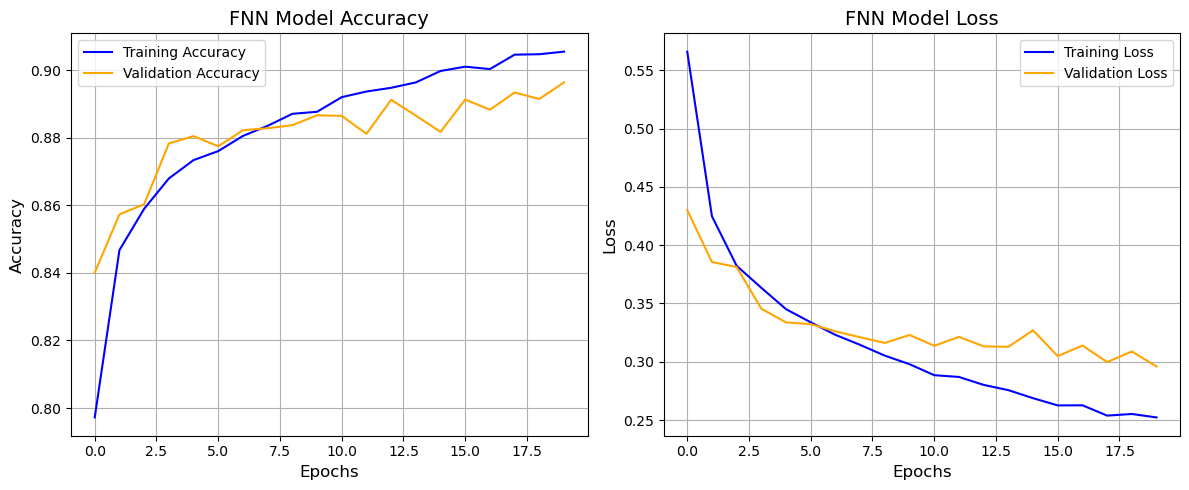

In [46]:
# Plotting for FNN model #N
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(fnn_history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(fnn_history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('FNN Model Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(fnn_history.history['loss'], label='Training Loss', color='blue')
plt.plot(fnn_history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('FNN Model Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


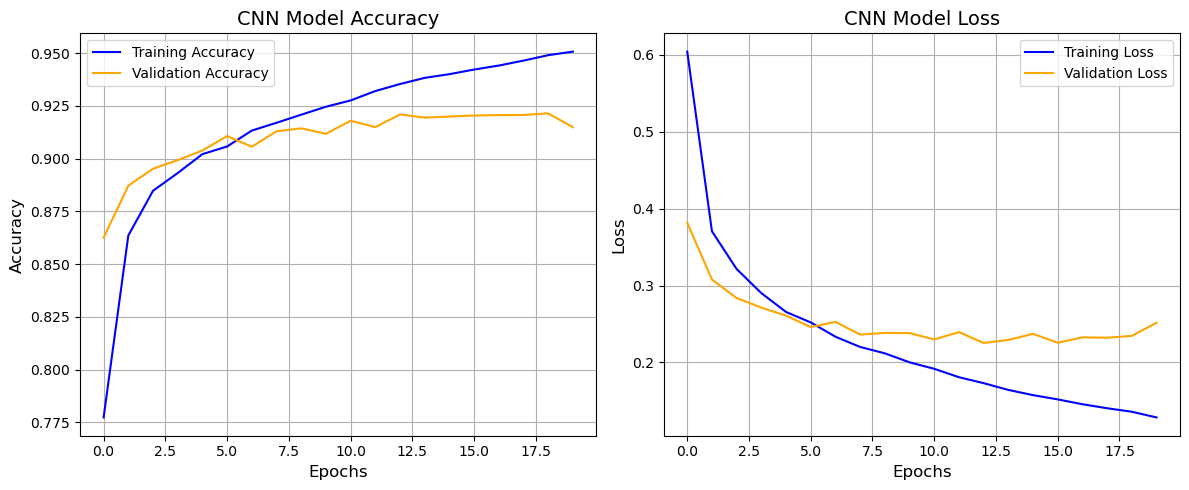

In [48]:
# Plotting for CNN model #N
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('CNN Model Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Training Loss', color='blue')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('CNN Model Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


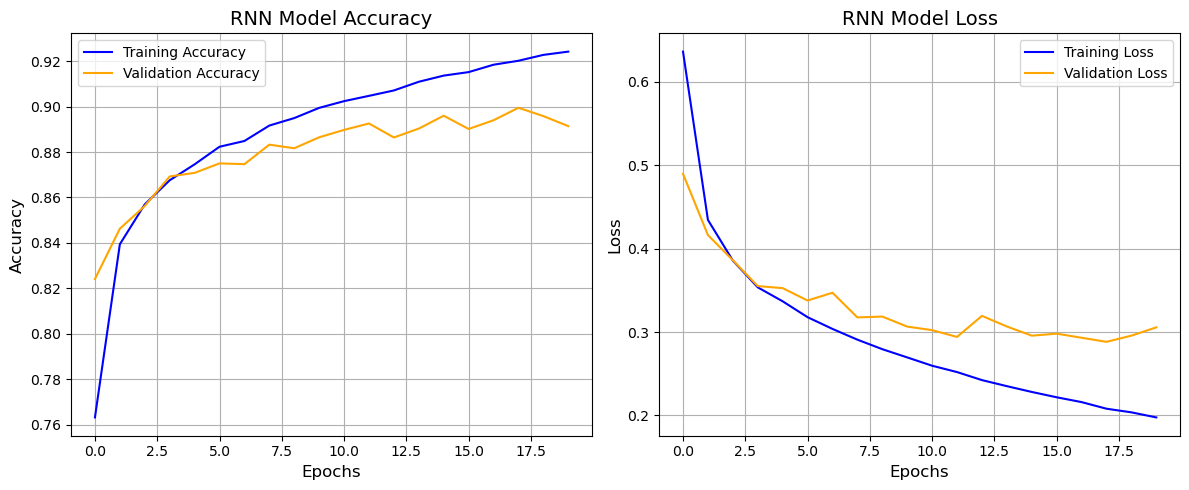

In [59]:
# Plotting for RNN model #N
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('RNN Model Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['loss'], label='Training Loss', color='blue')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('RNN Model Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


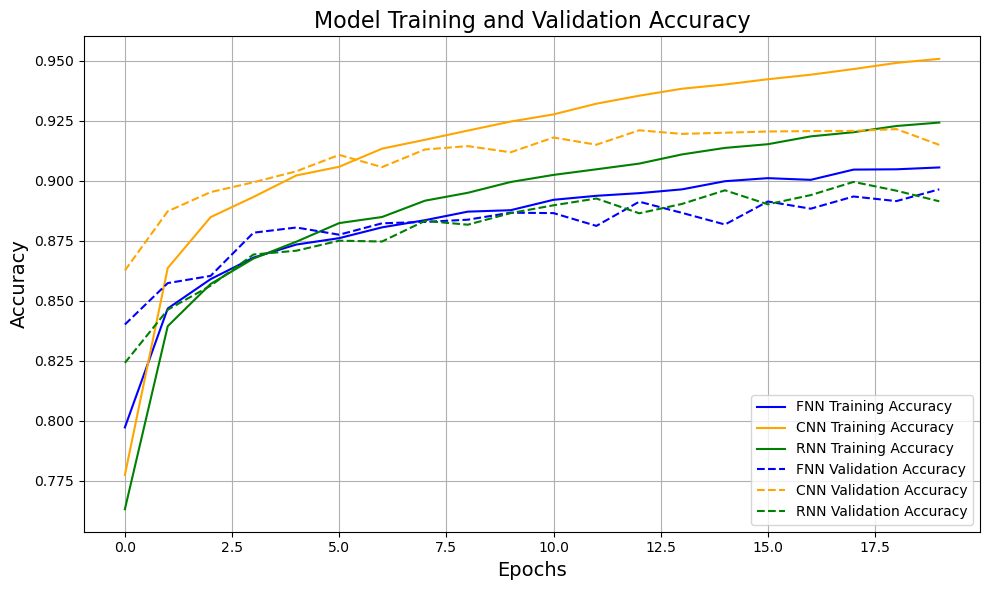

In [60]:
# Plotting training and validation accuracy for all models #F
plt.figure(figsize=(10, 6))

# Training Accuracy
plt.plot(fnn_history.history['accuracy'], label='FNN Training Accuracy', color='blue')
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy', color='orange')
plt.plot(rnn_history.history['accuracy'], label='RNN Training Accuracy', color='green')

# Validation Accuracy
plt.plot(fnn_history.history['val_accuracy'], label='FNN Validation Accuracy', linestyle='dashed', color='blue')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy', linestyle='dashed', color='orange')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy', linestyle='dashed', color='green')

# Adding titles and labels
plt.title('Model Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

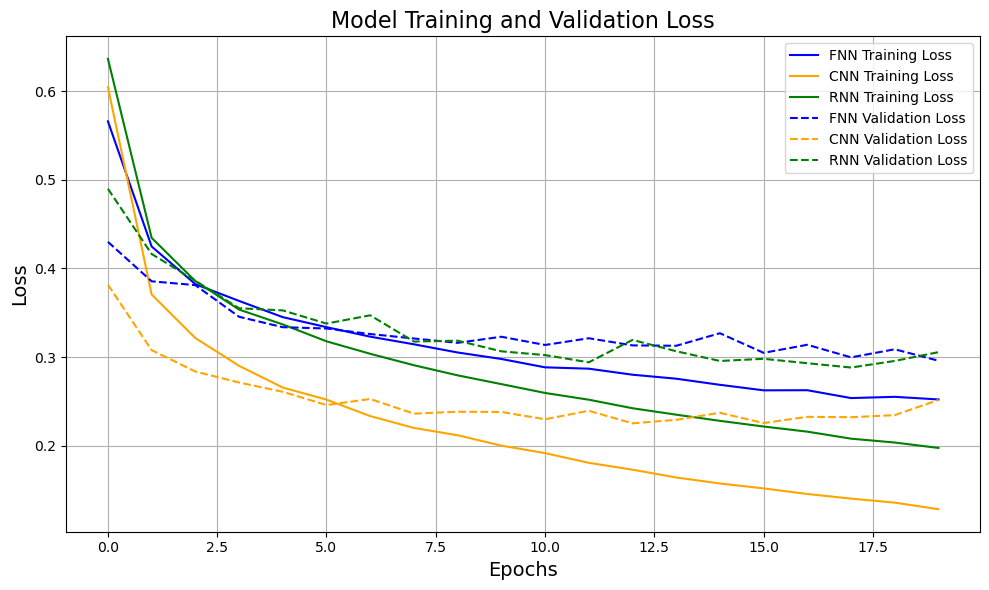

In [61]:
# Plotting training and validation loss for all models #F
plt.figure(figsize=(10, 6))

# Training Loss
plt.plot(fnn_history.history['loss'], label='FNN Training Loss', color='blue')
plt.plot(cnn_history.history['loss'], label='CNN Training Loss', color='orange')
plt.plot(rnn_history.history['loss'], label='RNN Training Loss', color='green')

# Validation Loss
plt.plot(fnn_history.history['val_loss'], label='FNN Validation Loss', linestyle='dashed', color='blue')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss', linestyle='dashed', color='orange')
plt.plot(rnn_history.history['val_loss'], label='RNN Validation Loss', linestyle='dashed', color='green')

# Adding titles and labels
plt.title('Model Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [49]:
from sklearn.metrics import classification_report #A

fnn_predictions = fnn_model.predict(X_test_fnn).argmax(axis=1)
print("FNN Classification Report")
print(classification_report(y_test, fnn_predictions, target_names=class_names))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step
FNN Classification Report
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.89      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.74      0.85      0.79      1000
       Dress       0.88      0.91      0.90      1000
        Coat       0.81      0.79      0.80      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.79      0.62      0.69      1000
     Sneaker       0.90      0.98      0.94      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.98      0.92      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.88     10000
weighted avg       0.89      0.89      0.88     10000



In [50]:
cnn_predictions = cnn_model.predict(X_test_cnn).argmax(axis=1) #B
print("CNN Classification Report")
print(classification_report(y_test, cnn_predictions, target_names=class_names))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
CNN Classification Report
              precision    recall  f1-score   support

 T-shirt/top       0.90      0.82      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.92      0.81      0.86      1000
       Dress       0.92      0.91      0.91      1000
        Coat       0.86      0.88      0.87      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.69      0.83      0.75      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.92     10000
weighted avg       0.92      0.91      0.92     10000



In [62]:
rnn_predictions = rnn_model.predict(X_test_rnn).argmax(axis=1) #M
print("RNN Classification Report")
print(classification_report(y_test, rnn_predictions, target_names=class_names))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RNN Classification Report
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.79      0.83      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.85      0.79      0.82      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.83      0.82      0.83      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.66      0.78      0.72      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000

